In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("C://Users//manka//Documents//Predictive Analytics//Project//Final//final_data.csv")
del df['Unnamed: 0']

In [7]:
df.head()

,news_url,title,no_of_retweets,label,length
0,speedtalk.com,BREAKING: First NFL Team Declares Bankruptcy O...,163,1,64
1,politics2020.info,Court Orders Obama To Pay $400 Million In Rest...,102,1,53
2,nscdscamps.org,UPDATE: Second Roy Moore Accuser Works For Mic...,220,1,69
3,howafrica.com,Oscar Pistorius Attempts To Commit Suicide,22,1,42
4,washingtonsources.org,Trump Votes For Death Penalty For Being Gay,550,1,43


In [2]:
!pip install vaderSentiment

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Neutral
Neutral
Neutral
Compound
Negative


In [36]:
def sentiment_analysis(text):
    sentiment_dict = analyzer.polarity_scores(text)
    if sentiment_dict['pos']>0.5:
        return 1
    elif sentiment_dict['neg']>0.5:
        return 2
    elif sentiment_dict['neu']>0.5:
        return 3
    else:
        return 4

In [37]:
df['sentiment'] = df['title'].map(lambda tweet: sentiment_analysis(tweet))

In [38]:
df.head()

,news_url,title,no_of_retweets,label,length,sentiment
0,speedtalk.com,BREAKING: First NFL Team Declares Bankruptcy O...,163,1,64,3
1,politics2020.info,Court Orders Obama To Pay $400 Million In Rest...,102,1,53,3
2,nscdscamps.org,UPDATE: Second Roy Moore Accuser Works For Mic...,220,1,69,3
3,howafrica.com,Oscar Pistorius Attempts To Commit Suicide,22,1,42,4
4,washingtonsources.org,Trump Votes For Death Penalty For Being Gay,550,1,43,2


In [39]:
df.to_csv(path_or_buf = 'C://Users//manka//Documents//Predictive Analytics//Project//Final//final_data1.csv')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

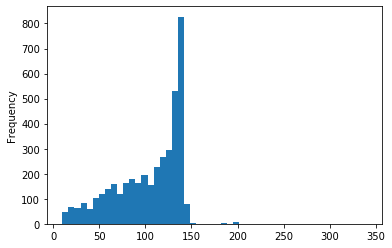

In [21]:
df['length'].plot(bins=50, kind='hist')

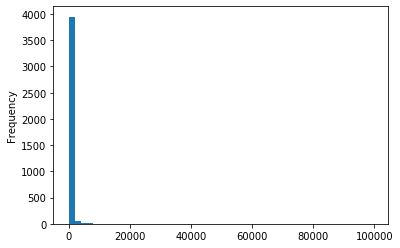

In [25]:
df['no_of_retweets'].plot(bins=50, kind='hist')

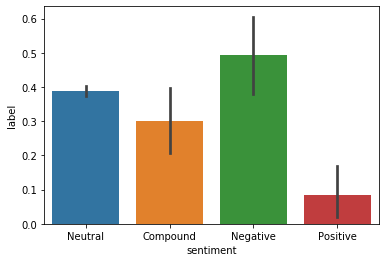

In [28]:
sns.barplot(x='sentiment', y='label', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DCC6AC448>,
      dtype=object)

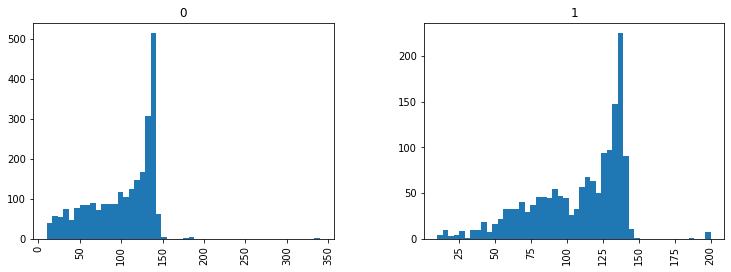

In [29]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DCD24DC48>,
      dtype=object)

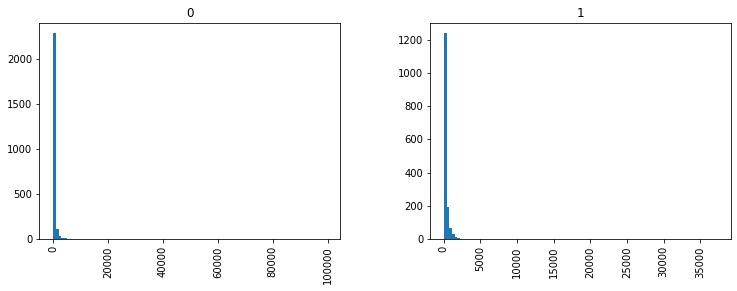

In [35]:
df.hist(column='no_of_retweets', by='label', bins=100,figsize=(12,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DCCB31BC8>,
      dtype=object)

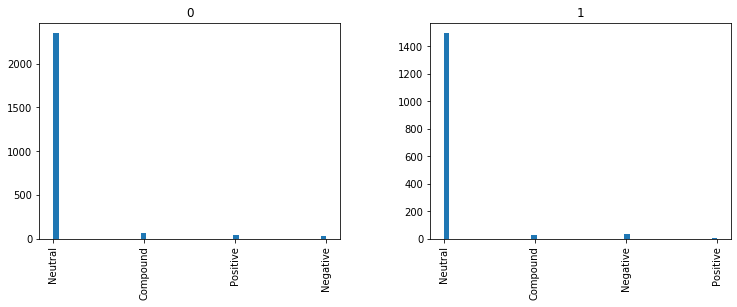

In [32]:
df.hist(column='sentiment', by='label', bins=50,figsize=(12,4))

In [33]:
df['news_url'].nunique()

1357